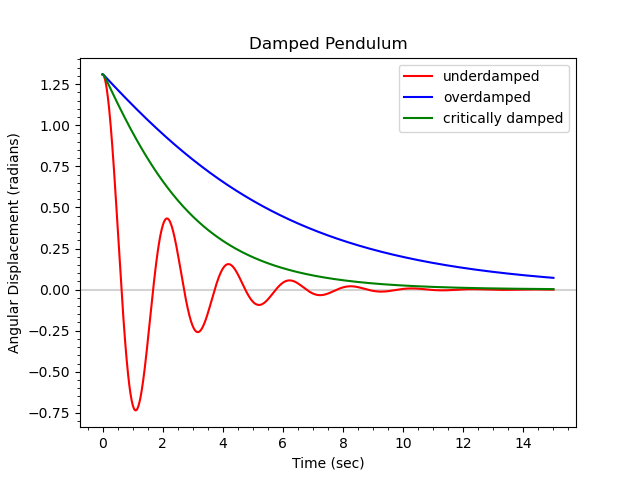

In [1]:
# damped_pendulum.ipynb
# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import solve_ivp


def model(time, state_vector, phase_constant, damping_constant):
    omega, theta = state_vector  # unpack dependent variables
    d_omega = -damping_constant * omega - phase_constant * np.sin(theta)
    d_theta = omega
    return d_omega, d_theta


def plot(ax):
    # Precalculate phase constant
    pendulum_length = 1.0  # meters
    phase_constant = 9.81 / pendulum_length

    # Set damping_constants
    underdamped_constant = 1.0
    overdamped_constant = pow(phase_constant, 2) / 2.0
    critically_damped_constant = pow(phase_constant, 2) / 4.0

    # Set initial conditions
    omega_initial = 0
    theta_initial = np.radians(75)  # 75 degrees

    # Set model duration (seconds)
    time_initial = 0
    time_final = 15

    # Calculate for an underdamped pendulum
    sol = solve_ivp(
        model,
        (time_initial, time_final),
        [omega_initial, theta_initial],
        max_step=0.01,
        args=[phase_constant, underdamped_constant],
    )
    time_steps = sol.t
    theta_underdamped = sol.y[1]

    # Calculate for an overdamped pendulum
    sol = solve_ivp(
        model,
        (time_initial, time_final),
        [omega_initial, theta_initial],
        max_step=0.01,
        args=[phase_constant, overdamped_constant],
    )
    theta_overdamped = sol.y[1]

    # Calculate for a critically damped pendulum
    sol = solve_ivp(
        model,
        (time_initial, time_final),
        [omega_initial, theta_initial],
        max_step=0.01,
        args=[phase_constant, critically_damped_constant],
    )
    theta_critically_damped = sol.y[1]

    ax.plot(
        time_steps,
        theta_underdamped,
        label="underdamped", #underdamped in red
        color="red",
        linestyle="solid",
        zorder=3,
    )
    ax.plot(
        time_steps,
        theta_overdamped,
        label="overdamped", #overdamped in blue
        color="blue",
        linestyle="solid",
        zorder=3,
    )
    ax.plot(
        time_steps,
        theta_critically_damped, #critically damped in green
        label="critically damped",
        color="green",
        linestyle="solid",
        zorder=3,
    )

    ax.set_title("Damped Pendulum")
    ax.set_xlabel("Time (sec)")
    ax.set_ylabel("Angular Displacement (radians)")
    ax.axhline(y=0.0, color="lightgray")
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.legend(loc="upper right")


def main():
    plt.close("all")
    fig = plt.figure(" ")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()


main()